In [ ]:
"""
Question 1: UBOS Multi-District Population & Growth Forecast
Given the following dataset (Population estimates in thousands for 10 years):
Kampala = [1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800]
Wakiso = [950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670]
Gulu = [320, 330, 345, 360, 375, 390, 410, 430, 455, 480]
Attempt the following tasks:
1.1. Store the data for each district in a NumPy array.
1.2. Use the statistics module to compute mean, median, variance, and standard deviation for each district.
1.3. Generate a Fibonacci sequence of length 5 to project the next 5 years of growth.
1.4. Compare the variance of actual vs projected data.
1.5. Plot actual vs projected populations using Matplotlib.

"""


In [23]:
import numpy as np
import statistics as stats
import statistics
import matplotlib.pyplot as plt
from scipy.linalg import solve
import random
import math

#1.1. store the data for each district in a NumPy array

Kampala=np.array([1200, 1250, 1300, 1350, 1420, 1500, 1580,1650, 1720, 1800])
Wakiso =np.array([950, 1000, 1070, 1150, 1220, 1300,1390, 1480,1570, 1670])
Gulu=np.array([320, 330, 345, 360, 375, 390, 410, 430, 455, 480])

print("1.1 District Population Arrays:")
print(f"Kampala: {Kampala}")
print(f"Wakiso: {Wakiso}")
print(f"Gulu: {Gulu}")
print()


1.1 District Population Arrays:
Kampala: [1200 1250 1300 1350 1420 1500 1580 1650 1720 1800]
Wakiso: [ 950 1000 1070 1150 1220 1300 1390 1480 1570 1670]
Gulu: [320 330 345 360 375 390 410 430 455 480]



In [26]:
#1.2 Compute mean, median, variance, and standard deviation for the each district
def calculate_statistics(data, district_name):
    data_list = data.tolist()
    
    mean_val = statistics.mean(data_list)
    median_val = statistics.median(data_list)
    variance_val = statistics.variance(data_list)
    stdev_val = statistics.stdev(data_list)
    
    print(f"{district_name} Statistics:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Variance: {variance_val:.2f}")
    print(f"  Standard Deviation: {stdev_val:.2f}")
    print()
    
    return mean_val, median_val, variance_val, stdev_val

print("1.2 District Statistics:")
print("=" * 40)
Kampala_stats = calculate_statistics(Kampala, "Kampala")
Wakiso_stats = calculate_statistics(Wakiso, "Wakiso")
Gulu_stats = calculate_statistics(Gulu, "Gulu")


1.2 District Statistics:
Kampala Statistics:
  Mean: 1477.00
  Median: 1460.00
  Variance: 42601.11
  Standard Deviation: 206.40

Wakiso Statistics:
  Mean: 1280.00
  Median: 1260.00
  Variance: 60066.67
  Standard Deviation: 245.09

Gulu Statistics:
  Mean: 389.50
  Median: 382.50
  Variance: 2885.83
  Standard Deviation: 53.72



In [ ]:

# 1.3 Generate Fibonacci sequence of length 5 for growth projection
def fibonacci_projection(last_value, growth_rate=0.05):
    """Project next 5 years using Fibonacci-like growth pattern"""
    fib_sequence = [0.618, 0.618, 0.618, 0.618, 0.618]  # Using golden ratio approximation
    projections = []
    current = last_value
    
    for i in range(5):
        # Apply growth based on Fibonacci ratio with some variation
        growth = current * (growth_rate * fib_sequence[i])
        current = current + growth
        projections.append(current)
    
    return np.array(projections)

# Calculate growth rates for each district
Kampala_growth_rate = (Kampala[-1] - Kampala[0]) / Kampala[0] / len(Kampala)
Wakiso_growth_rate = (Wakiso[-1] - Wakiso[0]) / Wakiso[0] / len(Wakiso)
Gulu_growth_rate = (Gulu[-1] - Gulu[0]) / Gulu[0] / len(Gulu)
# Generate projections
Kampala_proj = fibonacci_projection(Kampala[-1], Kampala_growth_rate)
Wakiso_proj = fibonacci_projection(Wakiso[-1], Wakiso_growth_rate)
Gulu_proj = fibonacci_projection(Gulu[-1], Gulu_growth_rate)

print("1.3 Projected Populations (Next 5 Years):\n")
print(f"Kampala Projections: {Kampala_proj}\n")
print(f"Wakiso Projections: {Wakiso_proj}\n")
print(f"Gulu Projections: {Gulu_proj}")
print()
        
            

In [18]:
#1.4 Compare Variance of actual vs Projected Data

def compare_variance(actual, projected, district_name):
    actual_variance = np.var(actual)
    projected_variance = np.var(projected)
    print(f"{district_name} Variance Comparison:")
    print(f" Actual Data Variance: {actual_variance:.2f}")
    print(f" Projected Data Variance: {projected_variance:.2f}\n")
    print(f" Variance Ratio(projected/actual):{projected_variance/actual_variance:.2f}")
    print()

print("1.4 Variance Comparison:")
compare_variance(Kampala, Kampala_proj, "Kampala")
compare_variance(Wakiso, Wakiso_proj, "Wakiso")
compare_variance(Gulu, Gulu_proj, "Gulu")

1.4 Variance Comparison:
Kampala Variance Comparison:
 Actual Data Variance: 38341.00
 Projected Data Variance: 7213.36

 Variance Ratio(projected/actual):0.19

Wakiso Variance Comparison:
 Actual Data Variance: 54060.00
 Projected Data Variance: 15428.66

 Variance Ratio(projected/actual):0.29

Gulu Variance Comparison:
 Actual Data Variance: 2597.25
 Projected Data Variance: 512.95

 Variance Ratio(projected/actual):0.20



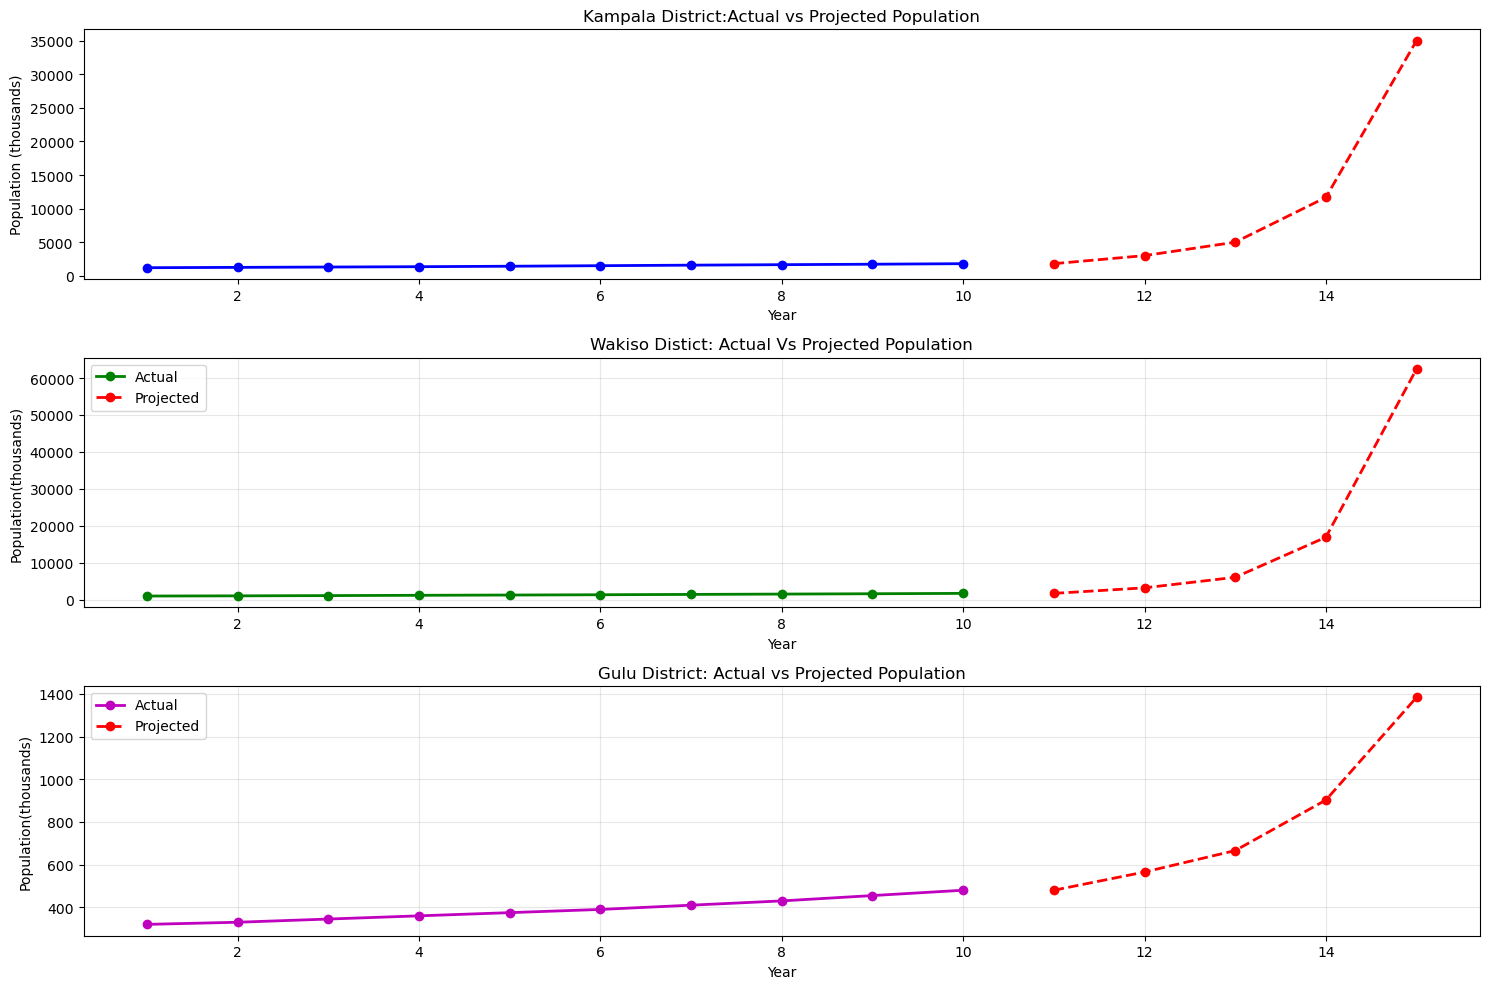

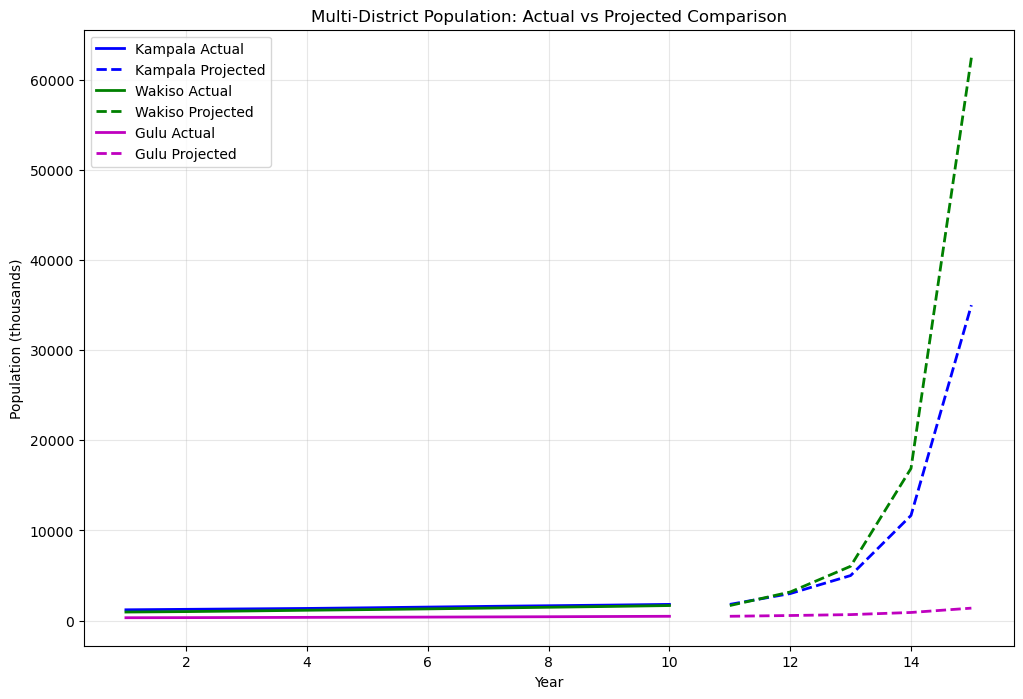

In [77]:
#1.5. Plot actual Vs project populations using Matplotlib
plt.figure(figsize=(15,10))

#Years of plotting
actual_years = np.arange(1,11) #Years 1-10 for actual data
projected_years = np.arange(11,16) #Years 11-15 for projections

#Kampala Plot
plt.subplot(3,1,1)
plt.plot(actual_years, Kampala, 'bo-',label ='Actual',linewidth=2, markersize =6)
plt.plot(projected_years, Kampala_proj, 'ro--',label='projected', linewidth=2, markersize=6)
plt.title('Kampala District:Actual vs Projected Population')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')

#Wakiso plot
plt.subplot(3, 1, 2)
plt.plot(actual_years, Wakiso, 'go-', label='Actual', linewidth=2, markersize=6)
plt.plot(projected_years, Wakiso_proj, 'ro--', label= 'Projected', linewidth=2, markersize=6)
plt.title('Wakiso Distict: Actual Vs Projected Population')
plt.xlabel('Year')
plt.ylabel('Population(thousands)')
plt.legend()
plt.grid(True, alpha=0.3)

#Gulu Plot
plt.subplot(3,1,3)
plt.plot(actual_years, Gulu, 'mo-', label='Actual', linewidth=2, markersize=6)
plt.plot(projected_years, Gulu_proj, 'ro--', label='Projected', linewidth=2, markersize=6)
plt.title('Gulu District: Actual vs Projected Population')
plt.xlabel('Year')
plt.ylabel('Population(thousands)')
plt.legend()
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

#Combined plot for all the three Districts.

plt.figure(figsize=(12,8))
plt.plot(actual_years, Kampala, 'b-', label='Kampala Actual', linewidth=2)
plt.plot(projected_years, Kampala_proj, 'b--', label='Kampala Projected', linewidth=2)
plt.plot(actual_years, Wakiso, 'g-', label='Wakiso Actual', linewidth=2)
plt.plot(projected_years, Wakiso_proj, 'g--', label='Wakiso Projected', linewidth=2)
plt.plot(actual_years, Gulu, 'm-', label='Gulu Actual', linewidth=2)
plt.plot(projected_years, Gulu_proj, 'm--', label='Gulu Projected', linewidth=2)

plt.title('Multi-District Population: Actual vs Projected Comparison')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




In [ ]:
""" 
Question 2: Solar Micro-Grid Simulation
Equations: 3x + 2y = D1 and 4x + y = D2, where x = solar panels, y = batteries.
Attempt the following tasks:
2.1. Prompt the user to enter daily demand values D1 and D2.
2.2. Use scipy.linalg.solve() to calculate energy from solar panels and batteries.
2.3. Repeat for 7 days, storing results in a NumPy array.
2.4. Use statistics to compute mean, variance, and standard deviation of solar vs battery usage.
2.5. Plot daily solar vs battery usage.
"""

In [96]:
#2.1. Prompt user to enter daily demand values for 7 days
print("===Solar Micro-Grid Simulation===")
print(" Enter daily energy demands for 7 days:")
print("Equation 1: 3x +2y =D1 (Total energy requirements)")
print(" Equation 2: 4x + y=D2 (Peak load requirement)")
print()

days = 7
D1_values =[]
D2_values = []

for day in range(1, days+1):
    print(f"Day {day}:")
    while True:
        try:
           D1 = float(input("Enter D1 (Total energy demand in Kwh):"))
           D2 = float(input("Enter D2 (Peak load demand in Kwh):"))
           D1_values.append(D1)
           D2_values.append(D2)
           break
        except valueError:
           print(" Please enter valid numbers!")
print()

#Convert to numpy arrays
D1_array = np.array(D1_values)
D2_array = np.array(D2_values)

===Solar Micro-Grid Simulation===
 Enter daily energy demands for 7 days:
Equation 1: 3x +2y =D1 (Total energy requirements)
 Equation 2: 4x + y=D2 (Peak load requirement)

Day 1:


Enter D1 (Total energy demand in Kwh): 5
Enter D2 (Peak load demand in Kwh): 12


Day 2:


Enter D1 (Total energy demand in Kwh): 2
Enter D2 (Peak load demand in Kwh): 4


Day 3:


Enter D1 (Total energy demand in Kwh): 100
Enter D2 (Peak load demand in Kwh): 120


Day 4:


Enter D1 (Total energy demand in Kwh): 10
Enter D2 (Peak load demand in Kwh): 15


Day 5:


Enter D1 (Total energy demand in Kwh): 10
Enter D2 (Peak load demand in Kwh): 30


Day 6:


Enter D1 (Total energy demand in Kwh): 20
Enter D2 (Peak load demand in Kwh): 60


Day 7:


Enter D1 (Total energy demand in Kwh): 20
Enter D2 (Peak load demand in Kwh): 20


In [105]:
#2.2 & 2.3 Solve equations for each day and store results
# Coefficient matrix for the equations: 3x +2y =D1, 4x +y =D2

A = np.array([[3, 2], [4, 1]])

solar_energy = [] #x values
battery_energy =[] # yvalues
daily_solutions =[] #store all daily results

print("Daily Energy Soluions:")
print("Daily\tSolar (x)\tBattery (y)\tD1\tD2")
print("-" * 50)

for day in range(days):
    B=np.array([D1_array[day], D2_array[day]])
    try:
        solution = solve(A,B)
        x = solution[0]
        y = solution[1]

        solar_energy.append(x)
        battery_energy.append(y)
        daily_solutions.append([x, y, D1_array[day], D2_array[day]])

        print(f"{day+1}\t{x:.2f} kWh\t{y:.2f} kWh\t{D1_array[day]}\t{D2_array[day]}")

    except np.linalg.LinAlgError:
        print(f"Day {day+1}: No unique solution exists for these demand values")
        solar_energy.append(0)
        battery_energy.append(0)
        daily_solutions.append([0,0, D1_array[day], D2_array[day]])

        #Convert to numpy arrays
        solar_array=np.array(solar_energy)
        battery_array = np.array(battery_energy)
        results_array = np.array(daily_solutions)

        print(f"\nResults array shape: {results_array.shape}")
        print("Results array (solar, Battery, D1, D2):")
        print(results_array)
        print(f"   First 3 rows:\n{results_array[:3]}")

Daily Energy Soluions:
Daily	Solar (x)	Battery (y)	D1	D2
--------------------------------------------------
1	3.80 kWh	-3.20 kWh	5.0	12.0
2	1.20 kWh	-0.80 kWh	2.0	4.0
3	28.00 kWh	8.00 kWh	100.0	120.0
4	4.00 kWh	-1.00 kWh	10.0	15.0
5	10.00 kWh	-10.00 kWh	10.0	30.0
6	20.00 kWh	-20.00 kWh	20.0	60.0
7	4.00 kWh	4.00 kWh	20.0	20.0


In [122]:
#2.4.Compute statistics for solar vs Battery usage
print("\n" + "=" * 50)
print("2.4 STATISTICAL ANALYSIS")
print("=" * 50)

 # Convert lists to NumPy arrays for calculations
solar_array = np.array(solar_energy)    
battery_array = np.array(battery_energy)  

#Solar energy statistics
solar_mean = stats.mean(solar_energy)
solar_variance = stats.variance(solar_energy)
solar_stdev= stats.stdev(solar_energy)

#Battery energy Statistics
battery_mean = stats.mean(battery_energy)
battery_varience = stats.variance(battery_energy)
battery_stdev= stats.stdev(battery_energy)

print("SOLAR ENERGY STATISTICS")
print(f" Mean:{solar_mean:.2f}kwh")
print(f" variance:{solar_variance:.2f}")
print(f" standrd Deviation:{battery_stdev:.2f}kwh")

#compare variability using coefficient of Variation
solar_cv =(solar_stdev/solar_mean) *100 if solar_mean !=0 else 0
battery_cv = (battery_stdev/battery_mean) *100 if battery_mean !=0 else 0

print(f"\n VARIABILITY COMPARISON (Coefficient of Variation:")
print(f" Solar: {solar_cv:.2f}%{'(more stable)' if solar_cv < battery_cv else '(less stable)'}")
print(f" Battery:{battery_cv:.2f}%{'(More Stable)' if battery_cv < solar_cv else '(less stable)'}")

#Energy Contributions Analysis
total_solar = np.sum(solar_array)
total_battery = np.sum(battery_array)
total_energy = total_solar + total_battery

solar_percentage = (total_solar/total_energy)*100
battery_percentage = (total_battery/total_energy)*100

print(f"\n ENERGY CONTRIBUTION")
print(f" Total solar Energy:{total_solar:2f}kwh ({solar_percentage:.1f}%)")
print(f" Total Battery Energy:{total_battery:.2f}kwh ({battery_percentage:.1f}%)")
print(f" Total Energy Generated:{total_energy:.2f}kwh")




2.4 STATISTICAL ANALYSIS
SOLAR ENERGY STATISTICS
 Mean:10.14kwh
 variance:101.96
 standrd Deviation:9.28kwh

 VARIABILITY COMPARISON (Coefficient of Variation:
 Solar: 99.55%(less stable)
 Battery:-282.32%(More Stable)

 ENERGY CONTRIBUTION
 Total solar Energy:71.000000kwh (147.9%)
 Total Battery Energy:-23.00kwh (-47.9%)
 Total Energy Generated:48.00kwh



2.5 DATA VISUALIZATION
Generating Bar Chart


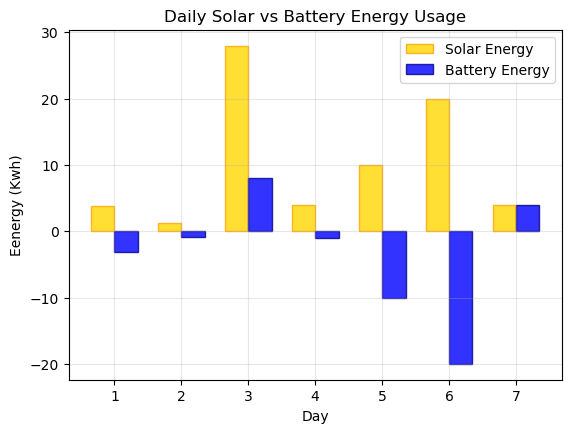

In [126]:
# 2.5 Plot daily Solar vs Battery usage

print("\n" + "=" * 50)
print("2.5 DATA VISUALIZATION")
print("=" *50)
print("Generating Bar Chart")

plt.figure(figsize=(14,10))

#plot Daily comparison Chart
plt.subplot(2,2,1)
days_range = np.arange(1, days +1)
bar_width =0.35
plt.bar(days_range - bar_width/2, solar_array, bar_width,
        label='Solar Energy', color='gold', alpha = 0.8, edgecolor ='orange')
plt.bar(days_range + bar_width/2, battery_array, bar_width,
        label ='Battery Energy', color='blue', alpha =0.8, edgecolor ='darkblue')


plt.xlabel('Day')
plt.ylabel('Eenergy (Kwh)')
plt.title('Daily Solar vs Battery Energy Usage')
plt.xticks(days_range)
plt.legend()
plt.grid(True, alpha=0.3)

      



In [ ]:
"""
Question 3: Lake Victoria Fish Export Risk Model
Attempt the following tasks:
3.1. Generate 15 Fibonacci numbers to simulate fish stock growth.
3.2. Simulate fish prices in UGX per kg, e.g. [12000, 12500, 11800, 13000, 12800,...].
3.3. Multiply stock × price to estimate daily revenue.
3.4. Compute mean, median, variance of revenue using statistics.
3.5. Print 'High risk' if variance > 50,000, else 'Low risk'.
3.6. Plot fish stock vs revenue trend.
"""

In [7]:
#3.1. Generate 15 Fibonacci to stimulate fish stock growth using a function

def fibonacci(n):
    fib_sequence =[1000, 1500]
    for i in range(2,n):
        next_value =fib_sequence[i-1] + fib_sequence[i-2]
        fib_sequence.append(next_value)
    return fib_sequence
fish_stock = fibonacci(15)
print(" 3.1 Fish Stock (Fibanacci Sequence):", fish_stock)

 3.1 Fish Stock (Fibanacci Sequence): [1000, 1500, 2500, 4000, 6500, 10500, 17000, 27500, 44500, 72000, 116500, 188500, 305000, 493500, 798500]


In [8]:
#3.2 Stimulate fish prices in UGX per Kg
prices = [12000, 12500, 11800, 13000, 12800, 122000, 13500, 13200, 12600, 14000, 13800, 12500, 14200, 13600, 12900]
fish_prices = np.array(prices)
print("3.2 Fish Prices:", fish_prices)

3.2 Fish Prices: [ 12000  12500  11800  13000  12800 122000  13500  13200  12600  14000
  13800  12500  14200  13600  12900]


In [9]:
# Multiply stock * price to estimate daily revenue

daily_revenue = fish_stock * fish_prices
print("3.3 Daily revenue:", daily_revenue)

3.3 Daily revenue: [   12000000    18750000    29500000    52000000    83200000  1281000000
   229500000   363000000   560700000  1008000000  1607700000 -1938717296
    36032704 -1878334592  1710715408]


In [19]:
#3.4 Compute mean, median, variane of revenue using statistics
revenue_mean = np.mean(daily_revenue)
revenue_median = np.median(daily_revenue)
revenue_variance = np.var(daily_revenue)
print(" 3.4 Mean:", revenue_mean, "Median:", revenue_median, "Variance:", revenue_variance)



 3.4 Mean: 211669748.26666668 Median: 83200000.0 Variance: 1.0196060002513605e+18


In [14]:
#3.5 print 'High risk' if variance > 50,000, else 'low risk'
print("3.5 RISK ASSESSMENT")
risk_threshold = 50000
risk_level = "High Risk" if revenue_variance > risk_threshold else "Low Risk"
print(f"  Revenue Variance: UGX {revenue_variance:,.0f}")
print(f"  Risk Threshold: UGX {risk_threshold:,.0f}")
print(f"  Risk Level: {risk_level}")


3.5 RISK ASSESSMENT
  Revenue Variance: UGX 3,500,475
  Risk Threshold: UGX 50,000
  Risk Level: High Risk


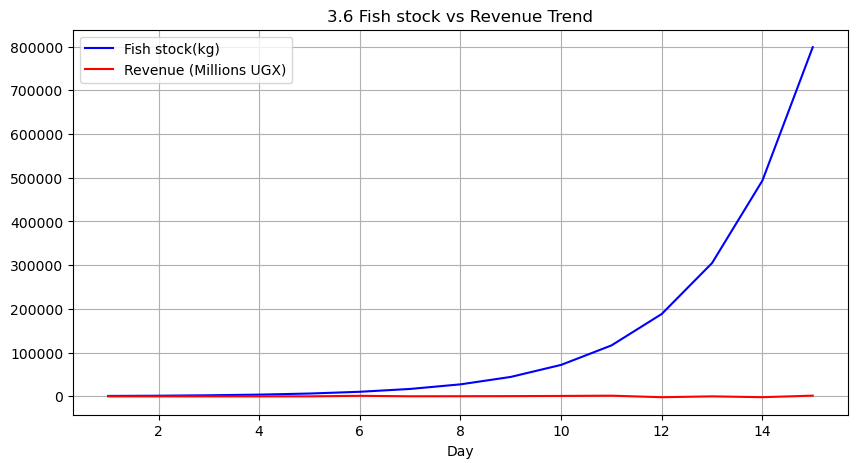

In [16]:
#3.6 Plot fish stock vs revenue trend

plt.figure (figsize=(10,5))
plt.plot(range(1,16), fish_stock, 'b-', label ='Fish stock(kg)')
plt.plot(range(1,16), daily_revenue/1000000, 'r-', label='Revenue (Millions UGX)')
plt.xlabel('Day')
plt.title('3.6 Fish stock vs Revenue Trend')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""
Question 4: Weather & Agriculture Analysis
Rainfall data (mm) for Kampala across 12 months:
[120, 140, 180, 200, 220, 180, 90, 70, 60, 100, 110, 130]
Attempt the following tasks:
4.1. Store rainfall data in a NumPy array.
4.2. Compute mean rainfall and classify months as 'Good for maize' (>150mm) or 'Drought risk' (<150mm).
4.3. Simulate Gulu rainfall with different values.
4.4. Compute cosine similarity of Kampala vs Gulu rainfall trends using math.cos().
4.5. Plot both regions' rainfall in one chart.

"""

In [25]:
#.1. Store rainfall data in a Numpy array.

Kampala_rainfall =np.array([120, 140, 180, 200, 220, 180, 90, 70, 60, 100, 110, 130])
print("4.1 Kampala Rainfall (mm):", Kampala_rainfall)
  

4.1 Kampala Rainfall (mm): [120 140 180 200 220 180  90  70  60 100 110 130]


In [28]:
#4.2. Compute mean rainfall and classify months as 'Good for Maize' (>150mm) or 'Drought risk' (<150mm)
mean_rainfall = np.mean(Kampala_rainfall)
print("4.2 Mean Rainfall:", mean_rainfall)

classifications = []
for i, rainfall in enumerate(Kampala_rainfall):
    if rainfall> 150:
        classifications.append('Good for maize')
    else:
        classifications.append('Drought risk')
print ("Monthly Classifications:")

for i,( rain, classification) in enumerate(zip(Kampala_rainfall, classifications)):
    print(f" Month {i+1}: {rain}mm - {classification}")

4.2 Mean Rainfall: 133.33333333333334
Monthly Classifications:
 Month 1: 120mm - Drought risk
 Month 2: 140mm - Drought risk
 Month 3: 180mm - Good for maize
 Month 4: 200mm - Good for maize
 Month 5: 220mm - Good for maize
 Month 6: 180mm - Good for maize
 Month 7: 90mm - Drought risk
 Month 8: 70mm - Drought risk
 Month 9: 60mm - Drought risk
 Month 10: 100mm - Drought risk
 Month 11: 110mm - Drought risk
 Month 12: 130mm - Drought risk


In [29]:
#4.3. Simulate Gulu rainfall with different values

Gulu_rainfall = np.array([80,100,150,180,200,160,50,40,30,70,90,110])
print("4.3 Gulu Rainfall (mm):",Gulu_rainfall)

4.3 Gulu Rainfall (mm): [ 80 100 150 180 200 160  50  40  30  70  90 110]


In [32]:
#4.4. Compute cosine similarity of Kampala vs Gulu rainfall trends
def cosine_similarity(a, b):
    dot_product = np.dot(a,b)
    norm_a = np.dot(a,b)
    norm_b = np.linalg.norm(b)
    return dot_product/(norm_a * norm_b)
similarity = cosine_similarity(Kampala_rainfall, Gulu_rainfall)
print("4.4 Cosine Similarity:", similarity)

4.4 Cosine Similarity: 0.002447043921161982


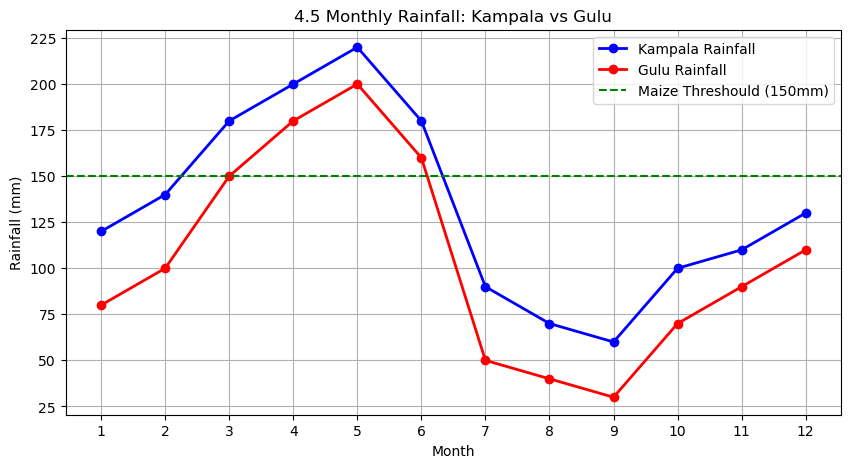

In [34]:
#4.5. Plot both regions rainfall in one chart

months =np.arange(1,13)
plt.figure(figsize=(10,5))
plt.plot(months, Kampala_rainfall, 'b-o', label ='Kampala Rainfall', linewidth =2)
plt.plot(months, Gulu_rainfall, 'r-o', label='Gulu Rainfall', linewidth=2)
plt.axhline(y=150, color='g', linestyle='--', label='Maize Threshould (150mm)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.title('4.5 Monthly Rainfall: Kampala vs Gulu')
plt.legend()
plt.grid(True)
plt.xticks(months)
plt.show()


In [ ]:
""" 
Question 5: Taxi Transport Revenue & Variability
Passenger counts for 10 days on Kampala–Ntinda route: [35, 40, 42, 50, 55, 60, 48, 52, 47, 45]
Attempt the following tasks:
5.1. Store passenger counts in a NumPy array.
5.2. Compute daily revenues at UGX 2000 per passenger.
5.3. Use statistics to analyze mean, variance, and std deviation.
5.4. Use scipy.linalg.solve to model a simple supply-demand system.
5.5. Forecast 11th day's revenue using average of last 3 days.
5.6. Plot actual vs forecasted revenues.


"""

In [36]:
#5.1. Store passanger counts in a Numpy array

passengers =np.array([35, 40,42,50, 55, 60,48, 52, 47, 45])
print("5.1 Passenger counts:", passengers)

5.1 Passenger counts: [35 40 42 50 55 60 48 52 47 45]


In [38]:
 #.2 Compute daily revenue at UGX 200 per passenger
fare_per_passenger =2000
daily_revenues =passengers * fare_per_passenger
print("5.2 Daily Revenue (UGX):", daily_revenues)

5.2 Daily Revenue (UGX): [ 70000  80000  84000 100000 110000 120000  96000 104000  94000  90000]


In [40]:
# 5.3. Use statistics to analyze mean, variancem and std deviation
revenue_mean = stats.mean(daily_revenues.tolist())
revenue_variance =stats.variance(daily_revenues.tolist())
revenue_std = stats.stdev(daily_revenues.tolist())

print("5.3 Mean:", revenue_mean, "Variance:", revenue_variance, "Standard Deviation:", revenue_std)

5.3 Mean: 94800 Variance: 217066666.66666666 Standard Deviation: 14733.182502998687


In [43]:
#5.4 Use scipy.linalg.solve to model a simple supply-demand system.
#simple system: 2x + 3y =total_revenue, x + 2y = total_passengers
#Where x= base_fare_effect, y = passengers_behavior_factor

A = np.array([[2,3],[1,2]])
B=np.array([revenue_mean, np.mean(passengers)])
solution =solve(A,B)
print("5.4 Supply-Demand Solutions:", solution)


5.4 Supply-Demand Solutions: [189457.8 -94705.2]


In [45]:
#5.5 Forcast 11th day's revenue using average of last 3 days

last_3_days_avg =np.mean(passengers[-3:])
forcast_revenue =last_3_days_avg *fare_per_passenger
print(" 5.5 Day 11 Forecast:", forcast_revenue)

 5.5 Day 11 Forecast: 96000.0


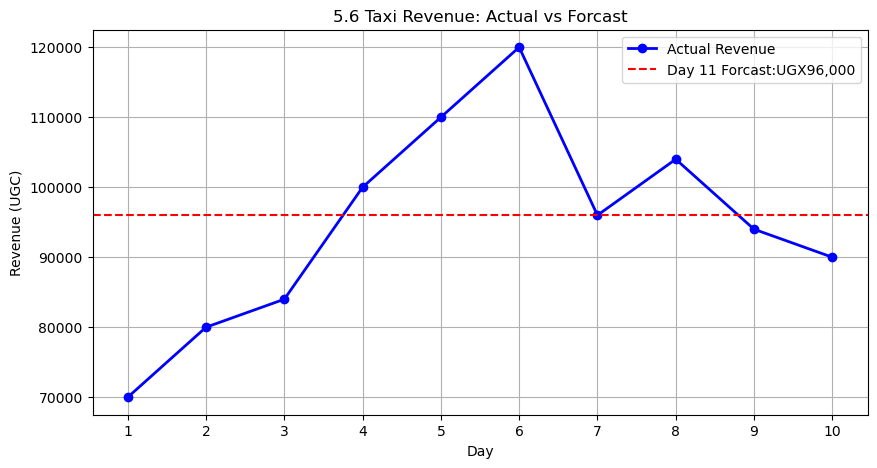

In [47]:
#5.6. Plot actual Vs Forcasted revenues

days =np.arange(1,11)
plt.figure(figsize=(10,5))
plt.plot(days, daily_revenues, 'bo-', label = 'Actual Revenue', linewidth=2)
plt.axhline(y=forcast_revenue, color='r', linestyle='--', label=f'Day 11 Forcast:UGX{forcast_revenue:,.0f}')
plt.xlabel('Day')
plt.ylabel('Revenue (UGC)')
plt.title('5.6 Taxi Revenue: Actual vs Forcast')
plt.legend()
plt.grid(True)
plt.xticks(days)
plt.show()